Rafael Gonçalves (186062)

In [1]:
import os
import urllib.request
import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import csv
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

%matplotlib inline

## Download dataset

In [2]:
train_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_treinamento.mat'
validation_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_val.mat'
test_url = 'http://www.dca.fee.unicamp.br/~lboccato/dados_teste.mat'
data_dir = os.path.abspath(os.path.relpath('../data'))
train_path = os.path.join(data_dir, 'train.mat')
validation_path = os.path.join(data_dir, 'validation.mat')
test_path = os.path.join(data_dir, 'test.mat')
image_dir = os.path.abspath(os.path.relpath('../doc/images'))

urllib.request.urlretrieve(train_url, train_path)
urllib.request.urlretrieve(validation_url, validation_path)
urllib.request.urlretrieve(test_url, test_path)

('/home/rafael/inbox/machine-learning/3-mlp-and-svm/data/test.mat',
 <http.client.HTTPMessage at 0x7ff5eeed35c0>)

In [3]:
train_set = scipy.io.loadmat(train_path)
val_set = scipy.io.loadmat(validation_path)
test_set = scipy.io.loadmat(test_path)

In [4]:
X_train = train_set["X"]
y_train = train_set["y"]
X_val = val_set["Xval"]
y_val = val_set["yval"]
X_test = test_set["Xt"]
y_test = test_set["yt"]

In [5]:
y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
y_test[y_test == -1] = 0

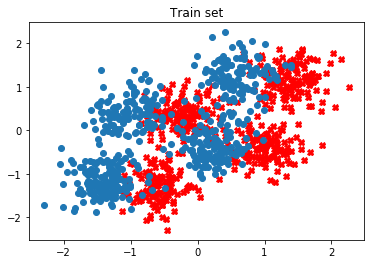

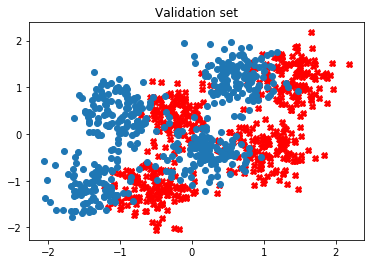

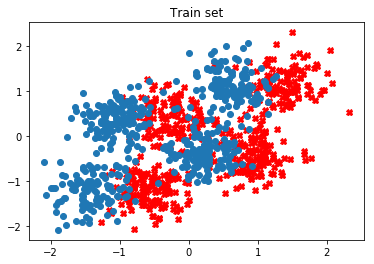

In [6]:
plt.plot(X_train[np.in1d(y_train, 1), 0], X_train[np.in1d(y_train, 1), 1], 'rX')
plt.plot(X_train[np.in1d(y_train, 0), 0], X_train[np.in1d(y_train, 0), 1], 'o')
plt.title("Train set")
plt.show()
plt.plot(X_val[np.in1d(y_val, 1), 0], X_val[np.in1d(y_val, 1), 1], 'rX')
plt.plot(X_val[np.in1d(y_val, 0), 0], X_val[np.in1d(y_val, 0), 1], 'o')
plt.title("Validation set")
plt.show()
plt.title("Train set")
plt.plot(X_test[np.in1d(y_test, 1), 0], X_test[np.in1d(y_test, 1), 1], 'rX')
plt.plot(X_test[np.in1d(y_test, 0), 0], X_test[np.in1d(y_test, 0), 1], 'o')
plt.show()

# 1 - Multilayer Perceptron (MLP)

In [7]:
C = 1 # number of classes
D_in = 2 # dimension of input

learning rate: 0.3


/usr/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Validation set: Avg. loss: 0.7102, Accuracy: 709/1000 (71%)



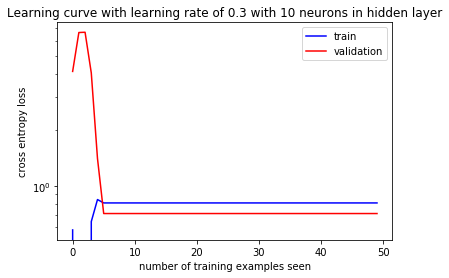

learning rate: 0.1
Validation set: Avg. loss: 0.7082, Accuracy: 511/1000 (51%)



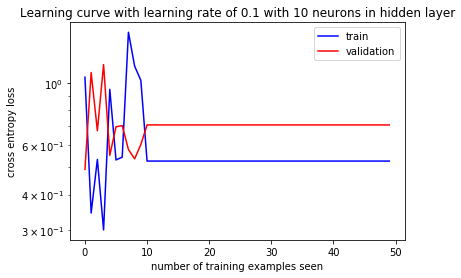

learning rate: 0.06
Validation set: Avg. loss: 0.4376, Accuracy: 710/1000 (71%)



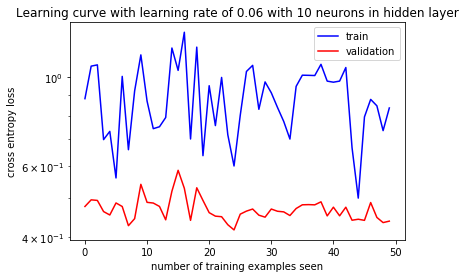

learning rate: 0.03
Validation set: Avg. loss: 0.4015, Accuracy: 777/1000 (78%)



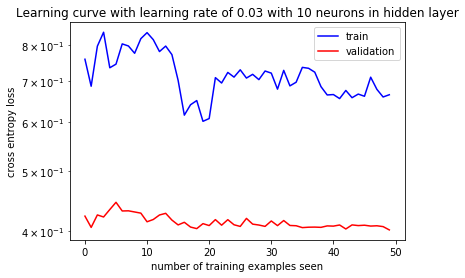

learning rate: 0.01
Validation set: Avg. loss: 0.3018, Accuracy: 881/1000 (88%)



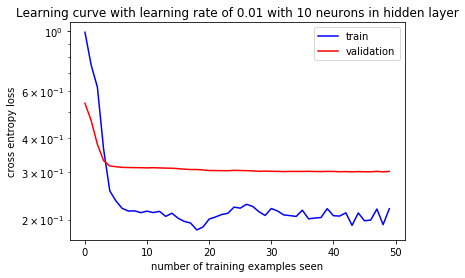

learning rate: 0.03
Validation set: Avg. loss: 0.4452, Accuracy: 719/1000 (72%)



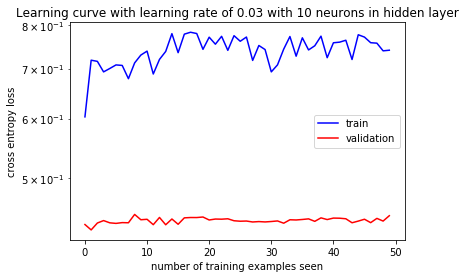

learning rate: 0.06
Validation set: Avg. loss: 0.4733, Accuracy: 698/1000 (70%)



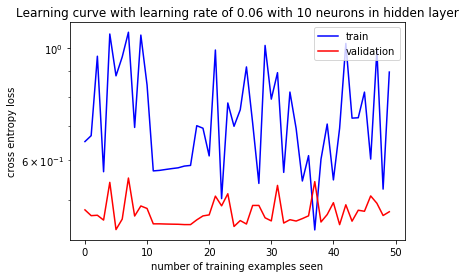

In [8]:
H = 10
epochs = 50

for learning_rate in [0.3, 0.1, 0.06, 0.03, 0.01, 0.03, 0.06]:
    print("learning rate:", learning_rate)
    train_losses = []
    val_losses = []

    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )

    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    model.train()
    for epoch in range(epochs):
        for idx, (x, y) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = model(x)
            loss = F.binary_cross_entropy(output, y, reduction="mean")
            loss.backward()
            optimizer.step()
        train_losses.append(loss.item())
            
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_train, dtype=torch.float),
                                             torch.tensor(y_train, dtype=torch.float)):
                output = model(data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('Validation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with learning rate of {} with 10 neurons in hidden layer'.format(learning_rate))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

H =  3
Train Epoch: 0 Loss: 1.227513
Train Epoch: 10 Loss: 0.113487
Train Epoch: 20 Loss: 0.105570
Train Epoch: 30 Loss: 0.116772
Train Epoch: 40 Loss: 0.109935
Train Epoch: 50 Loss: 0.110029
Train Epoch: 60 Loss: 0.109791
Train Epoch: 70 Loss: 0.109936
Train Epoch: 80 Loss: 0.109752
Train Epoch: 90 Loss: 0.109718

Validation set: Avg. loss: 0.4190, Accuracy: 807/1000 (81%)



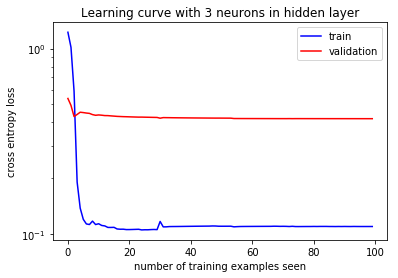

H =  6
Train Epoch: 0 Loss: 0.544721
Train Epoch: 10 Loss: 0.444268
Train Epoch: 20 Loss: 0.428934
Train Epoch: 30 Loss: 0.431178
Train Epoch: 40 Loss: 0.439353
Train Epoch: 50 Loss: 0.447229
Train Epoch: 60 Loss: 0.450147
Train Epoch: 70 Loss: 0.449503
Train Epoch: 80 Loss: 0.451490
Train Epoch: 90 Loss: 0.453625

Validation set: Avg. loss: 0.4188, Accuracy: 784/1000 (78%)



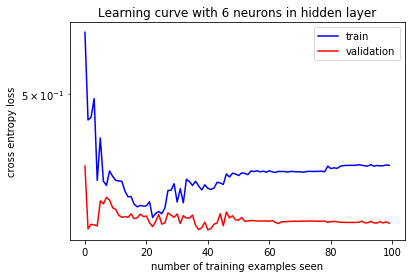

H =  10
Train Epoch: 0 Loss: 0.915363
Train Epoch: 10 Loss: 0.159337
Train Epoch: 20 Loss: 0.178276
Train Epoch: 30 Loss: 0.202609
Train Epoch: 40 Loss: 0.200876
Train Epoch: 50 Loss: 0.195709
Train Epoch: 60 Loss: 0.199700
Train Epoch: 70 Loss: 0.195980
Train Epoch: 80 Loss: 0.192070
Train Epoch: 90 Loss: 0.180560

Validation set: Avg. loss: 0.3552, Accuracy: 854/1000 (85%)



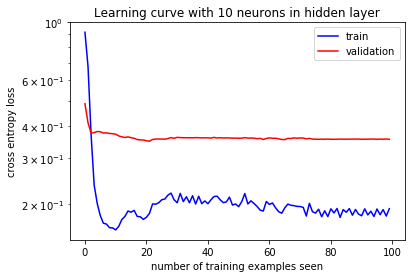

H =  30
Train Epoch: 0 Loss: 0.750115
Train Epoch: 10 Loss: 0.203564
Train Epoch: 20 Loss: 0.216638
Train Epoch: 30 Loss: 0.206035
Train Epoch: 40 Loss: 0.198580
Train Epoch: 50 Loss: 0.199099
Train Epoch: 60 Loss: 0.203444
Train Epoch: 70 Loss: 0.200422
Train Epoch: 80 Loss: 0.202189
Train Epoch: 90 Loss: 0.199109

Validation set: Avg. loss: 0.3497, Accuracy: 865/1000 (86%)



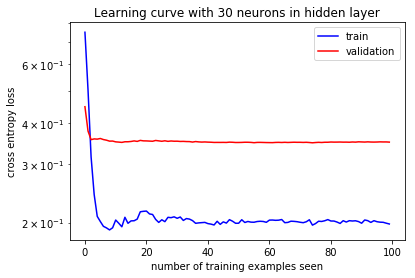

H =  60
Train Epoch: 0 Loss: 0.685934
Train Epoch: 10 Loss: 0.178768
Train Epoch: 20 Loss: 0.203366
Train Epoch: 30 Loss: 0.205868
Train Epoch: 40 Loss: 0.205212
Train Epoch: 50 Loss: 0.206429
Train Epoch: 60 Loss: 0.206771
Train Epoch: 70 Loss: 0.199366
Train Epoch: 80 Loss: 0.199295
Train Epoch: 90 Loss: 0.200559

Validation set: Avg. loss: 0.3499, Accuracy: 864/1000 (86%)



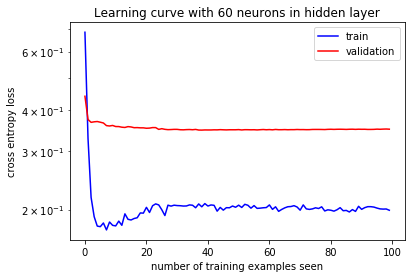

H =  100
Train Epoch: 0 Loss: 0.564499
Train Epoch: 10 Loss: 0.198653
Train Epoch: 20 Loss: 0.208711
Train Epoch: 30 Loss: 0.205603
Train Epoch: 40 Loss: 0.202806
Train Epoch: 50 Loss: 0.201394
Train Epoch: 60 Loss: 0.204128
Train Epoch: 70 Loss: 0.199572
Train Epoch: 80 Loss: 0.199797
Train Epoch: 90 Loss: 0.199449

Validation set: Avg. loss: 0.3503, Accuracy: 862/1000 (86%)



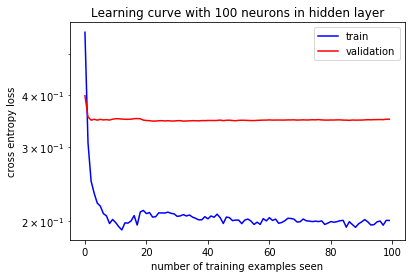

In [9]:
learning_rate = 0.01
epochs = 100
show_step = 10
for H in [3, 6, 10, 30, 60, 100]:
    print("H = ", H)
    train_losses = []
    val_losses = []
    
    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )
    
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    
    for epoch in range(epochs):
        model.train()
        for idx, (data, target) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = model(data)
            loss = F.binary_cross_entropy(output, target)
            loss.backward()
            optimizer.step()
        if epoch % show_step == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(epoch, loss.item()))
        train_losses.append(loss.item())        
    
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_val, dtype=torch.float),
                                             torch.tensor(y_val, dtype=torch.float)):
                output = model(data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('\nValidation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with {} neurons in hidden layer'.format(H))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

In [ ]:
epochs = 300
show_step = 10
H = 30
models = [None, None, None]
i = 0
for learning_rate in [0.006, 0.01, 0.03]:
    print("H = ", H, "Learning rate:", learning_rate)
    train_losses = []
    val_losses = []
    
    models[i] = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, C),
        torch.nn.Sigmoid(),
    )
    
    optimizer = optim.SGD(models[i].parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        models[i].train()
        for idx, (data, target) in enumerate(zip(torch.tensor(X_train, dtype=torch.float),
                                         torch.tensor(y_train, dtype=torch.float))):
            optimizer.zero_grad()
            output = models[i](data)
            loss = F.binary_cross_entropy(output, target)
            loss.backward()
            optimizer.step()
        if epoch % show_step == 0:
            print('Train Epoch: {} Loss: {:.6f}'.format(epoch, loss.item()))
        train_losses.append(loss.item())        
    
        models[i].eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_val, dtype=torch.float),
                                             torch.tensor(y_val, dtype=torch.float)):
                output = models[i](data)
                val_loss += F.binary_cross_entropy(output, target, size_average=False).item()
                pred = torch.round(output)
                correct += (1 if pred == target else 0)
        val_loss /= len(y_val)
        val_losses.append(val_loss)
    print('\nValidation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(y_val),
        100. * correct / len(y_val)))
    
    i += 1
    
    plt.plot(train_losses, color='blue')
    plt.plot(val_losses, color='red')
    plt.legend(["train", "validation"])
    plt.yscale("log")
    plt.title('Learning curve with {} neurons in hidden layer'.format(H))
    plt.xlabel('number of training examples seen')
    plt.ylabel('cross entropy loss')
    plt.show()

H =  30 Learning rate: 0.006
Train Epoch: 0 Loss: 0.751708
Train Epoch: 10 Loss: 0.844071
Train Epoch: 20 Loss: 0.541687
Train Epoch: 30 Loss: 0.265491
Train Epoch: 40 Loss: 0.167686
Train Epoch: 50 Loss: 0.131208
Train Epoch: 60 Loss: 0.115860
Train Epoch: 70 Loss: 0.109853
Train Epoch: 80 Loss: 0.109863
Train Epoch: 90 Loss: 0.110599
Train Epoch: 100 Loss: 0.110225
Train Epoch: 110 Loss: 0.109242
Train Epoch: 120 Loss: 0.107889
Train Epoch: 130 Loss: 0.106112
Train Epoch: 140 Loss: 0.106037


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in zip(torch.tensor(X_test, dtype=torch.float),
                             torch.tensor(y_test, dtype=torch.float)):
        output = model(data)
        test_loss += F.binary_cross_entropy(output, target, size_average=False).item()
        pred = torch.round(output)
        correct += (1 if pred == target else 0)
    test_loss /= len(y_test)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    val_loss, correct, len(y_test),
    100. * correct / len(y_test)))

In [ ]:
models = [None, None, None]
models[1] = model

In [ ]:
# Pass test data
X_test_t = torch.FloatTensor(X_test)
y_hat_test = models[1](X_test_t)
y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(y_test.reshape(-1,1)==y_hat_test_class) / len(y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

# Plot the decision boundary
# Determine grid range in x and y directions
x_min, x_max = X_train[:, 0].min()-0.3, X_train[:, 0].max()+0.3
y_min, y_max = X_train[:, 1].min()-0.3, X_train[:, 1].max()+0.3

# Set grid spacing parameter
spacing = min(x_max - x_min, y_max - y_min) / 100

# Create grid
XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

# Concatenate data to match input
data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))

# Pass data to predict method
data_t = torch.FloatTensor(data)
db_prob = models[1](data_t)

clf = np.where(db_prob<0.5,0,1)

Z = clf.reshape(XX.shape)

plt.figure(figsize=(12,8))
plt.title("Decision Regions for MLP with {} neurons in hidden layer".format(H))
plt.contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.plot(X_test[np.in1d(y_test, 1), 0], X_test[np.in1d(y_test, 1), 1], 'rx')
plt.plot(X_test[np.in1d(y_test, 0), 0], X_test[np.in1d(y_test, 0), 1], 'b.')
plt.show()

## 2 - Support-Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = SVC(gamma='scale')